In [28]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,File,Subjects,Keywords,Cited-by-count
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0
3,202202862.json,PHYS,NaN,0.0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0
...,...,...,...,...
20211,201802218.json,COMP,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,0.0
20212,201800225.json,MULT,NaN,27.0
20213,201802648.json,MEDI,Rehabilitation;Transcranial direct current sti...,7.0
20214,201800675.json,VETE,Canine cognitive dysfunction syndrome;Thailand...,1.0


In [29]:
df2 = df.dropna()
df2['Subjects']

0        AGRI;VETE;BIOC
1                  MEDI
2                  NEUR
4                  MEDI
5                  AGRI
              ...      
20208         PSYC;SOCI
20210              MEDI
20211              COMP
20213              MEDI
20214              VETE
Name: Subjects, Length: 16408, dtype: object

In [30]:


# Example data (replace with your actual DataFrame)
data = {
    "Subjects": df2['Subjects']}
df3 = pd.DataFrame(data)

# Step 1: Split the Subjects column into individual categories
df3['Subjects_split'] = df3['Subjects'].str.split(';')

# Step 2: Explode the lists into separate rows
exploded_df = df3.explode('Subjects_split')

# Step 3: Create dummy variables for the exploded column
dummy_df = pd.get_dummies(exploded_df['Subjects_split'])

# Step 4: Aggregate the dummy variables back to the original DataFrame
# Group by the original DataFrame's index
dummy_df = dummy_df.groupby(exploded_df.index).sum()

# Step 5: Combine the dummy-coded columns with the original DataFrame
df3 = pd.concat([df3, dummy_df], axis=1)

# Drop the intermediate column if you no longer need it
df3 = df3.drop(columns=['Subjects_split'])

df3

,Subjects,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,AGRI;VETE;BIOC,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,NEUR,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,AGRI,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20208,PSYC;SOCI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
20210,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20211,COMP,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20213,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
df4 = pd.concat([df2,df3.drop(columns=['Subjects'])], axis=1)

In [32]:
df4.head()

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df5= pd.DataFrame(df4['Keywords'])

df5

,Keywords
0,Microencapsulation;Basil Oil;Performance;Broil...
1,care delivery;neurocritical care;resources;COV...
2,Partial Least Squares (PLS) analysis;neurocogn...
4,Cardiorespiratory function;Bra;Metabolism
5,tropical rainforest;Ichneumonoidea;insect-frui...
...,...
20208,National prevalence;Intimate partner violence;...
20210,therapeutic hypothermia;neurological prognosti...
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...
20213,Rehabilitation;Transcranial direct current sti...


In [34]:
from gensim.models import Word2Vec
import numpy as np


In [35]:

# Step 1: Split sentences into words using semicolon
df5['Tokenized'] = df5["Keywords"].apply(lambda x: x.split(';'))

df5



,Keywords,Tokenized
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B..."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,..."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco..."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]"
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f..."
...,...,...
20208,National prevalence;Intimate partner violence;...,"[National prevalence, Intimate partner violenc..."
20210,therapeutic hypothermia;neurological prognosti...,"[therapeutic hypothermia, neurological prognos..."
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,"[Landsat 8, NDVI, Sentinel-2, Remote sensing, ..."
20213,Rehabilitation;Transcranial direct current sti...,"[Rehabilitation, Transcranial direct current s..."


In [36]:

# Step 2: Train Word2Vec model
# Create a Word2Vec model using the tokenized column
w2v_model = Word2Vec(sentences=df5['Tokenized'], vector_size=50, window=5, min_count=1, workers=4)

# Step 3: Convert words to vectors
def row_to_vector(row, model):
    vectors = []
    for word in row:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        # Average the vectors for the row
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no words were in the vocabulary
        return np.zeros(model.vector_size)

df5['Vector'] = df5['Tokenized'].apply(lambda x: row_to_vector(x, w2v_model))

# Step 4: Save or use the vectors
print(df5[['Keywords', 'Vector']])


                                                Keywords  \
0      Microencapsulation;Basil Oil;Performance;Broil...   
1      care delivery;neurocritical care;resources;COV...   
2      Partial Least Squares (PLS) analysis;neurocogn...   
4              Cardiorespiratory function;Bra;Metabolism   
5      tropical rainforest;Ichneumonoidea;insect-frui...   
...                                                  ...   
20208  National prevalence;Intimate partner violence;...   
20210  therapeutic hypothermia;neurological prognosti...   
20211  Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...   
20213  Rehabilitation;Transcranial direct current sti...   
20214  Canine cognitive dysfunction syndrome;Thailand...   

                                                  Vector  
0      [0.0029836707, 0.0070494954, 0.0042829853, 0.0...  
1      [-0.001733285, -0.0032273603, 0.0032569708, 0....  
2      [-0.004079341, -0.004421709, 0.007970106, 0.00...  
4      [0.009779788, 0.0022804635, 0.000481

In [37]:

df5.head()

,Keywords,Tokenized,Vector
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B...","[0.0029836707, 0.0070494954, 0.0042829853, 0.0..."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,...","[-0.001733285, -0.0032273603, 0.0032569708, 0...."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco...","[-0.004079341, -0.004421709, 0.007970106, 0.00..."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]","[0.009779788, 0.0022804635, 0.00048151473, 0.0..."
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f...","[-0.006743943, 0.006851089, -0.0029094904, 0.0..."


In [38]:
df5["Vector"].iloc[0].mean()

-0.0005903009

In [39]:
df5['Mean'] = df5['Vector'].apply(lambda x: x.mean())
df5['Vector'].head()

0    [0.0029836707, 0.0070494954, 0.0042829853, 0.0...
1    [-0.001733285, -0.0032273603, 0.0032569708, 0....
2    [-0.004079341, -0.004421709, 0.007970106, 0.00...
4    [0.009779788, 0.0022804635, 0.00048151473, 0.0...
5    [-0.006743943, 0.006851089, -0.0029094904, 0.0...
Name: Vector, dtype: object

In [40]:
df6 = pd.concat([df4,df5['Mean']], axis=1)

In [41]:

df6.head()


,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,-0.000590
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.000269
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-0.001547
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.000568
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000202


In [42]:
df6.loc[df6['Subjects']=="COMP"].sort_values(by="Mean")

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
1962,202203829.json,COMP,Online Learning Readiness;Structural Equation ...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.002822
18740,201802768.json,COMP,Usability;Android;Heuristic evaluation,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.002160
10057,201900311.json,COMP,Sentiment classification model;Convolutional n...,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.001895
9472,201900054.json,COMP,Ocean environment multimedia system;Semantic c...,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.001863
9235,201902982.json,COMP,UAV;Vegetation Indices;SPAD Chlorophyll Meter;...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.001805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8590,201900067.json,COMP,Stochastic Petri Nets;Formal Model;Multi-Serve...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001927
9899,201900063.json,COMP,Multiclass Classification;Text Classification;...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001937
20143,201802062.json,COMP,Enrofloxacin;Variable region;Monoclonal antibo...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.001974
3988,202204242.json,COMP,recommendation;rating conversion;Multi-criteria,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.002133


In [43]:
df6 = df5.drop(columns="Mean", inplace=True)

In [44]:
df4.head(1)

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df6 = df5.drop(columns=['Tokenized', 'Keywords'])

In [46]:
df6

,Vector
0,"[0.0029836707, 0.0070494954, 0.0042829853, 0.0..."
1,"[-0.001733285, -0.0032273603, 0.0032569708, 0...."
2,"[-0.004079341, -0.004421709, 0.007970106, 0.00..."
4,"[0.009779788, 0.0022804635, 0.00048151473, 0.0..."
5,"[-0.006743943, 0.006851089, -0.0029094904, 0.0..."
...,...
20208,"[0.0016016366, 0.0042206533, -0.0012999706, -0..."
20210,"[0.0014749601, 0.004739866, 0.0076411143, -0.0..."
20211,"[0.0026859315, 0.0058475607, 0.0019744493, 0.0..."
20213,"[-0.006920859, -0.005988215, 0.0038295372, 0.0..."


In [47]:
df7 = pd.concat([df4,df6], axis=1)
X = df7.drop(columns=['File','Subjects','Keywords','Cited-by-count'])
X.head()

,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Vector
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[0.0029836707, 0.0070494954, 0.0042829853, 0.0..."
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[-0.001733285, -0.0032273603, 0.0032569708, 0...."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[-0.004079341, -0.004421709, 0.007970106, 0.00..."
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[0.009779788, 0.0022804635, 0.00048151473, 0.0..."
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.006743943, 0.006851089, -0.0029094904, 0.0..."


In [48]:
vector_expanded = pd.DataFrame(X['Vector'].tolist(), index=X.index)
vector_expanded.columns = [f'Vector_{i}' for i in range(vector_expanded.shape[1])]
df_expanded = pd.concat([X.drop(columns=['Vector']), vector_expanded], axis=1)
df_expanded


,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,Vector_40,Vector_41,Vector_42,Vector_43,Vector_44,Vector_45,Vector_46,Vector_47,Vector_48,Vector_49
0,1,0,1,0,0,0,0,0,0,0,...,-0.002682,-0.003946,0.004476,-0.000367,-0.007549,0.001007,0.005552,-0.001951,-0.002661,0.006734
1,0,0,0,0,0,0,0,0,0,0,...,0.003241,-0.000821,0.003925,0.006114,-0.001041,-0.000246,-0.008856,-0.011240,-0.001423,0.008489
2,0,0,0,0,0,0,0,0,0,0,...,-0.003320,0.003774,0.004263,-0.010396,-0.001173,-0.002415,-0.005039,-0.002282,0.004117,-0.013035
4,0,0,0,0,0,0,0,0,0,0,...,0.011476,0.003498,0.000236,0.013188,0.004559,-0.013072,-0.003035,-0.006810,-0.008913,0.001203
5,1,0,0,0,0,0,0,0,0,0,...,0.002665,-0.003404,-0.003085,0.004655,-0.004487,0.008473,-0.001217,0.000435,-0.007560,-0.002180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20208,0,0,0,0,0,0,0,0,0,0,...,-0.009452,-0.003047,0.001157,-0.002583,0.007854,-0.005505,-0.009388,0.010485,0.003035,0.009048
20210,0,0,0,0,0,0,0,0,0,0,...,-0.000772,-0.006125,-0.005145,-0.002302,-0.007223,-0.005527,-0.003062,-0.001930,-0.010355,-0.006188
20211,0,0,0,0,0,0,1,0,0,0,...,-0.001426,-0.005637,-0.009046,0.003722,0.004002,0.000463,-0.003707,0.005612,0.006048,-0.004905
20213,0,0,0,0,0,0,0,0,0,0,...,0.006600,0.013409,-0.002794,-0.007406,0.012021,0.000442,0.002833,0.001298,0.002291,-0.006148


In [49]:
df_expanded.to_csv('out.csv')

In [50]:
df_expanded.columns

Index(['AGRI', 'ARTS', 'BIOC', 'BUSI', 'CENG', 'CHEM', 'COMP', 'DECI', 'DENT',
       'EART', 'ECON', 'ENER', 'ENGI', 'ENVI', 'HEAL', 'IMMU', 'MATE', 'MATH',
       'MEDI', 'MULT', 'NEUR', 'NURS', 'PHAR', 'PHYS', 'PSYC', 'SOCI', 'VETE',
       'Vector_0', 'Vector_1', 'Vector_2', 'Vector_3', 'Vector_4', 'Vector_5',
       'Vector_6', 'Vector_7', 'Vector_8', 'Vector_9', 'Vector_10',
       'Vector_11', 'Vector_12', 'Vector_13', 'Vector_14', 'Vector_15',
       'Vector_16', 'Vector_17', 'Vector_18', 'Vector_19', 'Vector_20',
       'Vector_21', 'Vector_22', 'Vector_23', 'Vector_24', 'Vector_25',
       'Vector_26', 'Vector_27', 'Vector_28', 'Vector_29', 'Vector_30',
       'Vector_31', 'Vector_32', 'Vector_33', 'Vector_34', 'Vector_35',
       'Vector_36', 'Vector_37', 'Vector_38', 'Vector_39', 'Vector_40',
       'Vector_41', 'Vector_42', 'Vector_43', 'Vector_44', 'Vector_45',
       'Vector_46', 'Vector_47', 'Vector_48', 'Vector_49'],
      dtype='object')

In [51]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5, algorithm='brute')
neigh.fit(df_expanded)

NearestNeighbors(algorithm='brute')

Distances to neighbors: [[0.         6.21377953 7.0181669  7.23470867 7.33217358]]
Indices of neighbors: [[    0  3629 11137  4436  6662]]


/var/folders/h3/pwlyvdxs71v5yn4z60q6qlv40000gn/T/ipykernel_42491/2778207331.py:18: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")
/var/folders/h3/pwlyvdxs71v5yn4z60q6qlv40000gn/T/ipykernel_42491/2778207331.py:19: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(query_point[0]), np.log1p(query_point[1]), color='red', label='Query Point', s=100)
/var/folders/h3/pwlyvdxs71v5yn4z60q6qlv40000gn/T/ipykernel_42491/2778207331.py:20: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(neighbors[:, 0]), np.log1p(neighbors[:, 1]), color='green', label='Neighbors', s=100)


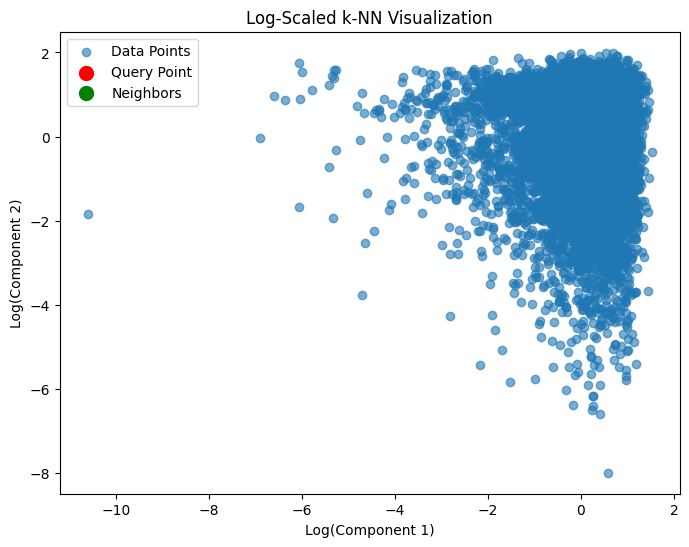

In [52]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_expanded)
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")
plt.scatter(np.log1p(query_point[0]), np.log1p(query_point[1]), color='red', label='Query Point', s=100)
plt.scatter(np.log1p(neighbors[:, 0]), np.log1p(neighbors[:, 1]), color='green', label='Neighbors', s=100)
plt.title('Log-Scaled k-NN Visualization')
plt.xlabel('Log(Component 1)')
plt.ylabel('Log(Component 2)')
plt.legend()
plt.show()

Distances to neighbors: [[0.         6.38200183 6.42824044 6.51513716 6.60484866]]
Indices of neighbors: [[  0 250 839 255 836]]


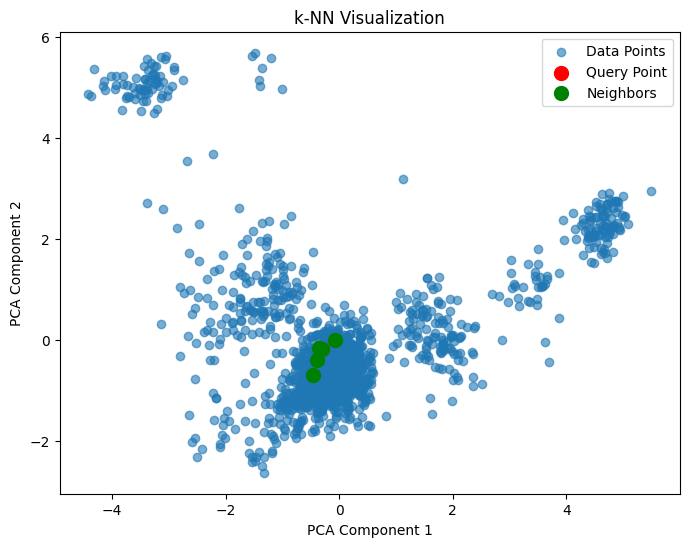

In [53]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


features_scaled = scaler.fit_transform(df_expanded.loc[df_expanded['COMP'] == 1])
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], label="Data Points", alpha=0.6)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.scatter(query_point[0], query_point[1], color='red', label='Query Point', s=100)
plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label='Neighbors', s=100)
plt.title('k-NN Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()